## A Quick Guide to besttracks
**23 November 2020 by MiniUFO**

---
[TOC]

---
### 1. Introduction
Tropical cyclone (TC) best-track datasets are analyzed, maintained, and hosted by several Regional Specialized Meteorological Centers (RSMCs), agencies, or projects all over the world.  These agencies include:
-  **JTWC:** Joint Typhoon Warning Center, Naval Oceanography Portal.  This agency currently hosted TC datasets over several ocean basins except the North Atlantic Ocean i.e.,  western Pacific basin (BWP), North Indian Ocean (BIO), and Southern Hemisphere basin (BSH).
https://www.metoc.navy.mil/jtwc/jtwc.html?best-tracks
-  **CMA:** China Meteorological Administration.  This agency only hosted the TC dataset over the western North Pacific.
http://tcdata.typhoon.org.cn/en/zjljsjj_zlhq.html
- **JMA:** RSMC Tokyo-Typhoon Center, Japan Meteorological Agency.  This agency only hosted the TC dataset over the western North Pacific
https://www.jma.go.jp/jma/jma-eng/jma-center/rsmc-hp-pub-eg/trackarchives.html
- **NHC:** National Hurricane Center, National Oceanic and Atmospheric Administration.  This agency hosted the TC datasets for both the North Atlantic Ocean and eastern North Pacific, which are not covered by JTWC.
https://www.nhc.noaa.gov/data/#hurdat
- **IBTrACS:** International Best Track Archive for Climate Stewardship.  This project merges the best-track datasets already exist at other agencies (more than the above) into a worldwide TC database.
https://www.ncdc.noaa.gov/ibtracs/


| RSMC | WNP | NEP | NAT | NIO | SIO | WSP | SAT |
| :----: | ---:| :--: | -- | --- | ---:| :--: |--- |
| JTWC | X |  |  | X | X | X |  |
| CMA | X |  |  |  |  |  |  |
| JMA | X |  |  |  |  |  |  |
| NHC |  | X | X |  |  |  |  |
| IBTrACS | X | X | X | X | X |  | X |


Unfortunately, different agencies use different data formats.  This python-based project **`besttracks`**, aims to provide a unified interface to access these datasets in different formats, and organizes them into a unified data structure called **`TCSet`** and **`TC`**, which are based on `pandas.DataFrame` that are convient for python users.  Simple plot of track and intensity is also easy and some basic statistics are also provided.

Up to now, the datasets from the above agencies are supported.  It would be good to add more agencies and more formats.  We also provide the parser function for CMA operational forecast data (BABJ format), which is also popular in China.


---

## 2. Examples
### 2.1 Best-track datasets manipulations
Parsing different best-track datasets into `TCSet` would be as simple as:

In [1]:
import sys
sys.path.append('../')
from besttracks import parse_TCs

# parse dataset from different sources
TCs_CMA = parse_TCs('D:/Data/Typhoons/CMA/original/CH*.txt', agency='CMA')
TCs_JMA = parse_TCs('D:/Data/Typhoons/JMA/original//bst_all.txt', agency='JMA')
TCs_JTWC = parse_TCs('D:/Data/Typhoons/JTWC/original/bwp/bwp*.txt', agency='JTWC')

# Brief describe the dataset
print(TCs_CMA)
print(TCs_JMA)
print(TCs_JTWC)

empty file is found: D:/Data/Typhoons/JTWC/original/bwp\bwp011953.txt
empty file is found: D:/Data/Typhoons/JTWC/original/bwp\bwp201956.txt
TC best-track dataset (CMA):
  2337 TCs from 1949 to 2019, 16568.0 cyclone days
  longest   TC 197203, Rita     : 25.00 days 
  shortest  TC 196500, Vera     :  1.00 days 
  strongest TC 195800, Ida      :   878 hPa, 213.8 knot
  weakest   TC 194900, NONAME   :  1000 hPa,  23.3 knot
  largest  ACE 196123, Nancy    : 853018 (knot)^2
  smallest ACE 195400, NONAME   :   544 (knot)^2

TC best-track dataset (JMA):
  1811 TCs from 1951 to 2019, 15483.8 cyclone days
  longest   TC 197207, RITA     : 22.00 days 
  shortest  TC 196112, NONAME   :  0.25 days 
  strongest TC 197920, TIP      :   870 hPa, 140.0 knot
  weakest   TC 197710, CARLA    :   990 hPa,  35.0 knot
  largest  ACE 197920, TIP      : 433075 (knot)^2
  smallest ACE 195101, NONAME   :     0 (knot)^2

TC best-track dataset (JTWC):
  1905 TCs from 1945 to 2010, 13280.2 cyclone days
  longest  

Notice that there are two blank files (`bwp011953.txt`, `bwp201956.txt`) in JTWC dataset.  Ignoring that, we obtained the basic TC information on the three datasets that all cover the western North Pacific where TCs are most frequent and intense.  **Notice that** the wind data in CMA is in unit of `m/s`, and it is autometically changed to `knot`, for a unified comparison with other datasets.  One can toggle it back to `m/s` as:  

In [2]:
print(TCs_CMA[0].wndunit)

TCs_CMA.change_wind_unit()

print(TCs_CMA[0].wndunit)

knot
m/s


All three datasets can be plotted immediately as:

C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\Administrator\Anaconda3\l

<GeoAxesSubplot:title={'center':'WNP TCs (JTWC)'}>

C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


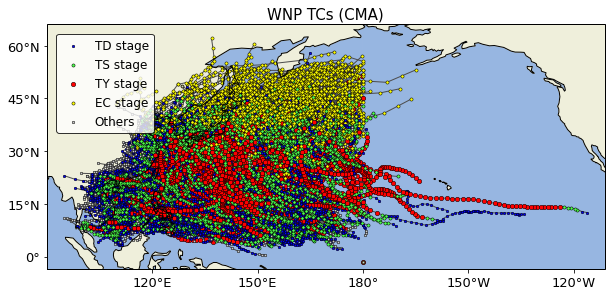

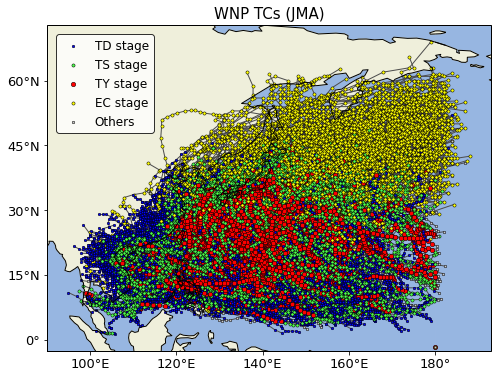

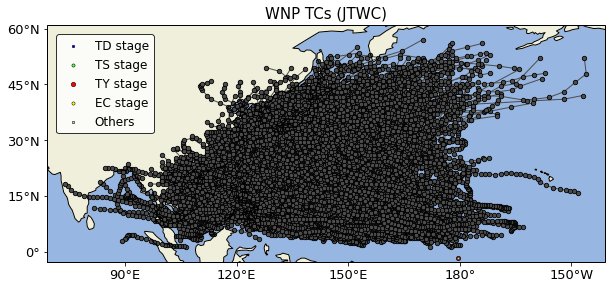

In [3]:
TCs_CMA.plot_tracks(figsize=(10,6), fontsize=15, size=20, linewidth=1, title='WNP TCs (CMA)',
             line_color=(0.3, 0.3, 0.3), add_legend=True, trackonly=False)
TCs_JMA.plot_tracks(figsize=(10,6), fontsize=15, size=20, linewidth=1, title='WNP TCs (JMA)',
             line_color=(0.3, 0.3, 0.3), add_legend=True, trackonly=False)
TCs_JTWC.plot_tracks(figsize=(10,6), fontsize=15, size=20, linewidth=1, title='WNP TCs (JTWC)',
             line_color=(0.3, 0.3, 0.3), add_legend=True, trackonly=False)

Notice that since there is no `type` data in JTWC dataset, all the dots are black.  We can also bin the tracks into gridded statistics (also known as PDF) as:

C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of 

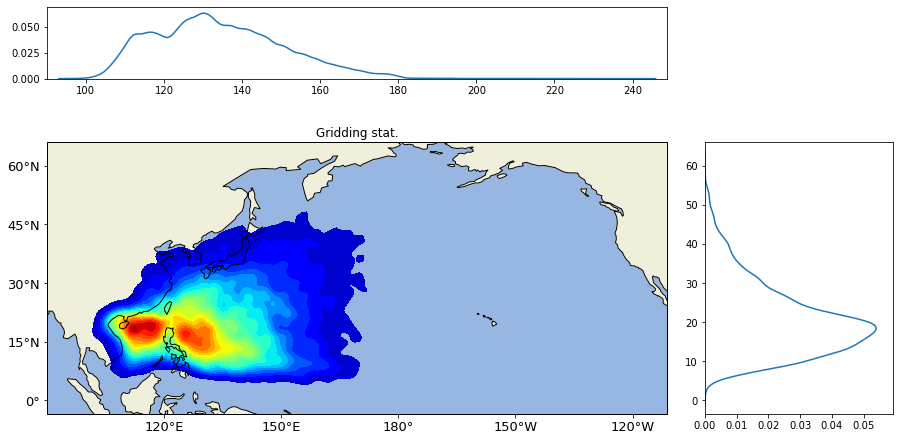

In [5]:
ax, (_, _, _) = TCs_CMA.binning()

### 2.2 A single TC manipulation
Manipulating a single `TC` is also simple:

TC (ID=197517, name=Helen, year=1975, fcstTime=0, unit=m/s)
                  TIME   LAT         LON    TYPE     PRS   WND
0  1975-11-01 00:00:00  14.5  124.500000  OTHERS  1008.0  10.0
1  1975-11-01 06:00:00  14.4  123.500000  OTHERS  1007.0  10.0
2  1975-11-01 12:00:00  14.4  122.900002  OTHERS  1005.0  10.0
3  1975-11-01 18:00:00  14.5  122.199997  OTHERS  1005.0  10.0
4  1975-11-02 00:00:00  14.6  121.500000      TD  1005.0  12.0
5  1975-11-02 06:00:00  14.2  120.099998      TD  1005.0  12.0
6  1975-11-02 12:00:00  13.8  118.699997      TD  1005.0  15.0
7  1975-11-02 18:00:00  13.5  117.400002      TD  1005.0  15.0
8  1975-11-03 00:00:00  13.5  115.900002      TD  1004.0  15.0
9  1975-11-03 06:00:00  13.5  114.400002      TD  1004.0  15.0
10 1975-11-03 12:00:00  13.9  113.699997      TS   998.0  20.0
11 1975-11-03 18:00:00  14.2  112.800003      TS   998.0  20.0
12 1975-11-04 00:00:00  14.4  112.000000      TS   998.0  20.0
13 1975-11-04 06:00:00  15.0  110.300003      TS   998.0  

C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe

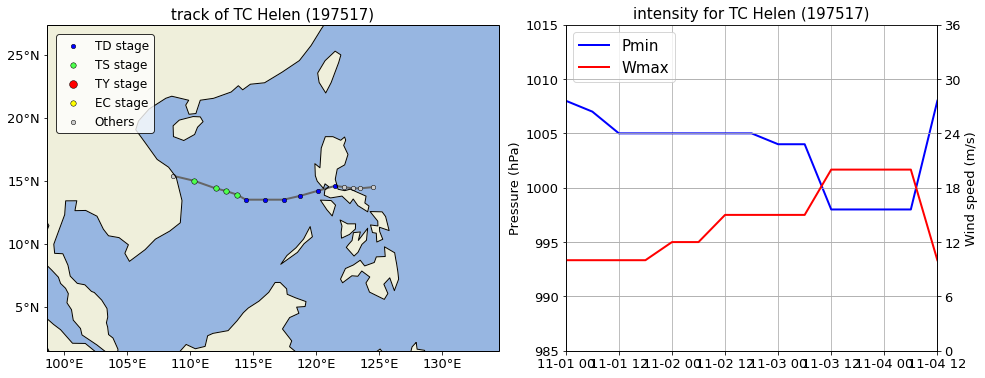

In [9]:
# Selecting a single TC using index
tc = TCs_CMA[1010]

# Briefly descibe the TC
print(tc)

# Plot the TC track and intensity
tc.plot()

TC (ID=201409, name=Rammasun, year=2014, fcstTime=0, unit=m/s)
                  TIME        LAT         LON TYPE     PRS   WND
0  2014-07-10 00:00:00   8.800000  152.300003   TD  1008.0  13.0
1  2014-07-10 06:00:00   9.700000  151.600006   TD  1008.0  13.0
2  2014-07-10 12:00:00  10.800000  150.500000   TD  1008.0  13.0
3  2014-07-10 18:00:00  11.500000  149.500000   TD  1006.0  15.0
4  2014-07-11 00:00:00  11.900000  148.300003   TD  1006.0  15.0
5  2014-07-11 06:00:00  12.500000  147.300003   TD  1006.0  15.0
6  2014-07-11 12:00:00  13.100000  146.300003   TD  1006.0  15.0
7  2014-07-11 18:00:00  13.300000  145.500000   TD  1006.0  15.0
8  2014-07-12 00:00:00  13.500000  144.600006   TD  1006.0  15.0
9  2014-07-12 06:00:00  13.500000  143.199997   TS  1002.0  18.0
10 2014-07-12 12:00:00  13.400000  141.500000   TS   998.0  20.0
11 2014-07-12 18:00:00  13.400000  140.100006   TS   998.0  20.0
12 2014-07-13 00:00:00  13.500000  138.399994   TS   998.0  20.0
13 2014-07-13 06:00:00  13.

C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe

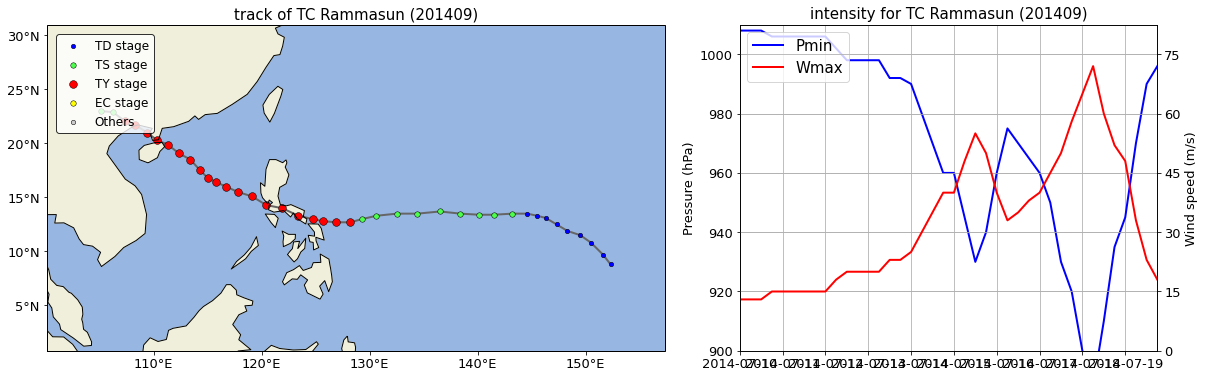

In [10]:
# Selecting a single TC using conditions
tc = TCs_CMA.select(lambda tc:tc.name=='Rammasun' and tc.year==2014)[0]

# Briefly descibe the TC
print(tc)

# Plot the TC track and intensity
tc.plot()

### 2.3 China operational data manipulation
The operational TC forecast by CMA from China has its own best track data format named `BABJ`.

remove undef in 1603:
2016  07  26  12  000       112.3        18.2  9999    18       0.0       0.0     157.5      26.0
TC best-track dataset (BABJ):
  1281 TCs from 2016 to 2016,    0.0 cyclone days
  longest   TC 1601, NEPARTAK :  0.00 days 
  shortest  TC 1601, NEPARTAK :  0.00 days 
  strongest TC 1614, MERANTI  :   900 hPa, 136.1 knot
  weakest   TC 1622, HAIMA    :   998 hPa,  27.2 knot
  largest  ACE 1622, HAIMA    : 101198 (knot)^2
  smallest ACE 1601, NEPARTAK :     0 (knot)^2



C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


<GeoAxesSubplot:title={'center':'tracks'}>

C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


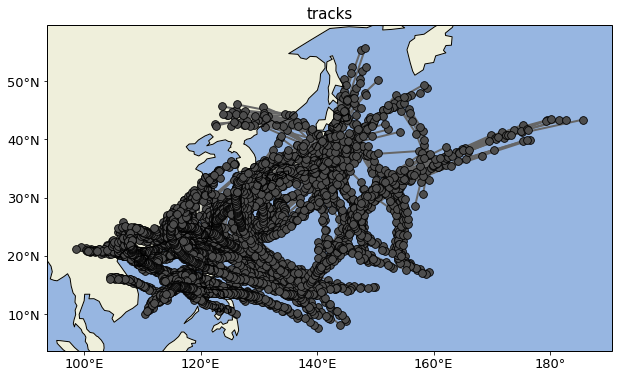

In [14]:
TCs_babj = parse_TCs('D:/Data/Typhoons/BABJ/2016/babj*.dat', agency='BABJ')

print(TCs_babj)

TCs_babj.plot_tracks()

Notice that for a single TC, there are ensemble forecasting tracks valid at different initial times.  This can be seen by selecting a single TC as:

C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


<AxesSubplot:title={'center':'intensity for TC NEPARTAK (1601)'}, ylabel='Pressure (hPa)'>

C:\Users\Administrator\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


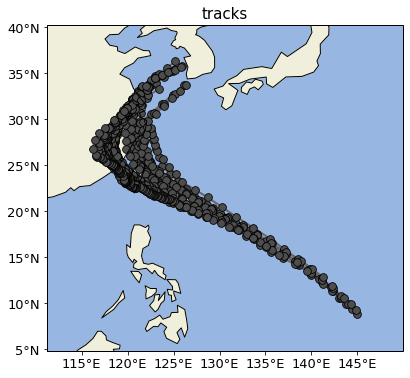

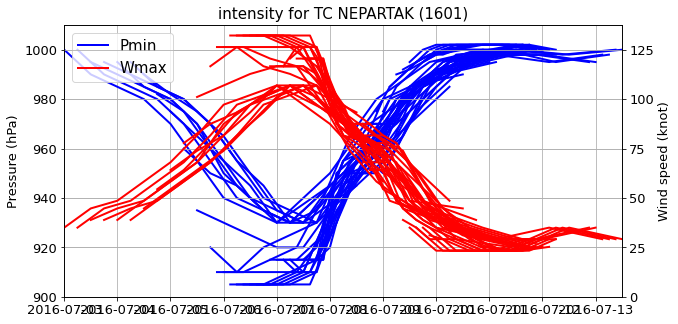

In [15]:
import numpy as np
import pandas as pd

tcs = TCs_babj.select(lambda tc:tc.ID=='1601')

# interpolation to regular 6hour data
for tc in tcs:
    strT = tc.records.iloc[ 0, 1]
    endT = tc.records.iloc[-1, 1]
    data = tc.records.drop_duplicates().set_index('FCST')

    dummy = data.reindex(data.index.union(
                np.linspace(strT, endT, int((endT-strT)/6)+1)))

    interp_data = data.combine_first(dummy).interpolate() \
                     .reset_index().rename(columns={'index':'FCST'})

    interp_data['TIME'] = interp_data['TIME'][0] + \
                          interp_data['FCST'].astype('int') * \
                          pd.Timedelta(1, unit='h')

    tc.records = interp_data

# plot the interpolated data
tcs.plot_tracks()
tcs.plot_intensities()

---
### References
[https://www.metoc.navy.mil/jtwc/jtwc.html?best-tracks](https://www.metoc.navy.mil/jtwc/jtwc.html?best-tracks)

[http://tcdata.typhoon.org.cn/en/zjljsjj_zlhq.html](http://tcdata.typhoon.org.cn/en/zjljsjj_zlhq.html)

[https://www.jma.go.jp/jma/jma-eng/jma-center/rsmc-hp-pub-eg/trackarchives.html](https://www.jma.go.jp/jma/jma-eng/jma-center/rsmc-hp-pub-eg/trackarchives.html)

[https://www.nhc.noaa.gov/data/#hurdat](https://www.nhc.noaa.gov/data/#hurdat)

[https://www.ncdc.noaa.gov/ibtracs/](https://www.ncdc.noaa.gov/ibtracs/)